# <div align='center'>第4章 回归分析</div>


## 4.5 广义线性模型



### 4.5.1 逻辑斯蒂回归模型（Logistic Regression Model）


In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#### （1）Logit函数曲线以及逻辑斯蒂分布的PDF与CDF曲线

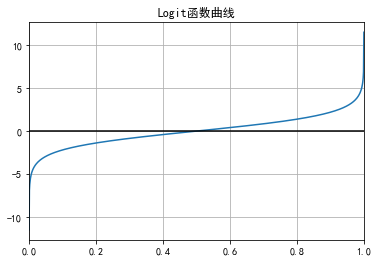

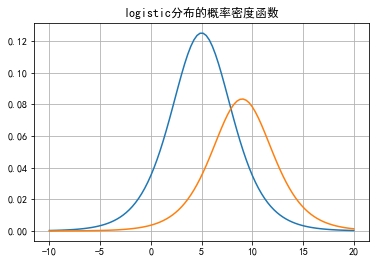

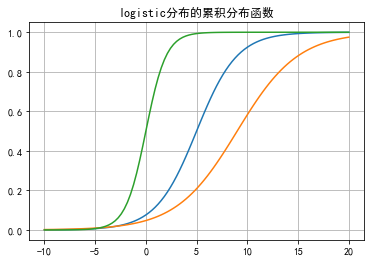

In [5]:
###logit函数的图形
p1=np.linspace(0.00001,0.99999,1000)
yp1=np.log(p1/(1-p1))
plt.plot(p1,yp1)
plt.grid()
plt.xlim(0,1)
plt.axhline(y=0,c='black')
plt.title('Logit函数曲线')

###logistic分布的图形
plt.figure()
l1=np.linspace(-10,20,100)
#logistic分布的概率密度图形
pdf_l=np.exp(-(l1-5)/2)/(2*(1+np.exp(-(l1-5)/2))**2)
plt.plot(l1,pdf_l)
pdf_l=np.exp(-(l1-9)/2)/(3*(1+np.exp(-(l1-9)/2))**2)
plt.plot(l1,pdf_l)
plt.grid()
plt.title('logistic分布的概率密度函数')
#累积分布函数
plt.figure()
cdf_l=1/(1+np.exp(-(l1-5)/2))
plt.plot(l1,cdf_l)
cdf_l=1/(1+np.exp(-(l1-9)/3))
plt.plot(l1,cdf_l)
cdf_l=1/(1+np.exp(-l1))
plt.plot(l1,cdf_l)
plt.title('logistic分布的累积分布函数')
plt.grid()
plt.show()

#### （2）逻辑斯蒂回归(单自变量)

#### 示例：

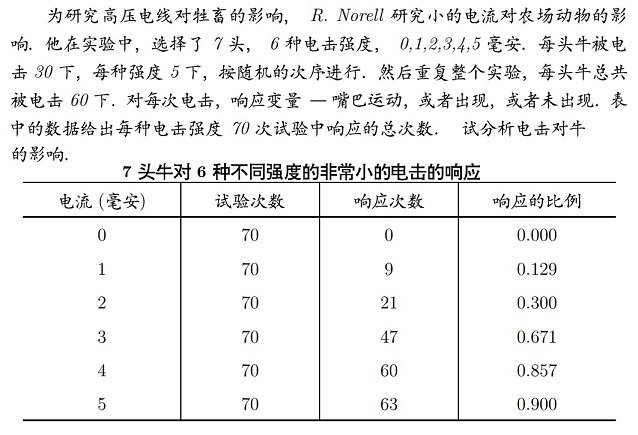

In [6]:
'''
广义线性回归模型（使用二项式连接函数）。
'''

n = np.array([70,70,70,70,70,70])
success = np.array([0,9,21,47,60,63])
x = np.array([0,1,2,3,4,5])
###注意因变量是由实验成功次数与失败次数组成的矩阵(列向量)
y = np.c_[success,n-success]
x_model = sm.add_constant(x)#构建自变量的设计矩阵

###使用二项分布族，默认使用logit连接函数
#显式指定连接函数：family=sm.families.Binomial(sm.families.links.logit())
binom_model = sm.GLM(y,x_model,family=sm.families.Binomial())
results = binom_model.fit(use_t=True)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.046
Date:                Mon, 16 Aug 2021   Deviance:                       9.3526
Time:                        12:32:06   Pearson chi2:                     7.58
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3010      0.324    -10.195      0.001      -4.200      -2.402
x1             1.2459      0.112     11.132      0.000       0.935       1.557
==============================================================================
"""

- ##### 回归方程：
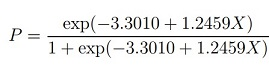

In [7]:
'''
模型的拟合优度检验
'''
import scipy.stats as st
d=results.deviance/results.df_resid
p=st.chi2.sf(results.pearson_chi2,df=results.df_resid)
d,p

(2.338155496361303, 0.10809474298217712)

In [8]:
#回归方程为：p=np.exp(-3.3010+1.2459*X)/(1+np.exp(-3.3010+1.2459*X))，X为电流强度
resp = np.exp(-3.3010+3.5*1.2459)/(1+np.exp(-3.3010+3.5*1.2459))
print('当电流为3.5mA时，有响应牛的概率是：%d%%'%(np.round(resp,2)*100))

当电流为3.5mA时，有响应牛的概率是：74%


In [9]:
###如果有50%的牛有响应，电流强度应该是多少？
from scipy.optimize import fsolve
def f1(x,p):
    return np.exp(-3.3010+1.2459*x)/(1+np.exp(-3.3010+1.2459*x))-p
amp = fsolve(f1,[2.0],args=(0.5,))
print('当50%%的牛有响应时，电流强度至少%0.2fmA'%(np.round(amp,2)))

当50%的牛有响应时，电流强度至少2.65mA


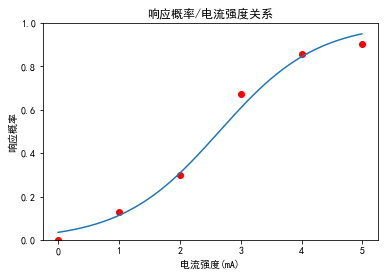

In [10]:
###logistic回归曲线
import matplotlib.pyplot as plt
d = np.arange(0,5,0.01)
resp = np.exp(-3.3010+d*1.2459)/(1+np.exp(-3.3010+d*1.2459))
plt.plot(d,resp)

###散点图
p_success = success/70
plt.scatter(x,p_success,color='r')
plt.ylim(0.0,1.0)
plt.title("响应概率/电流强度关系")
plt.xlabel("电流强度(mA)")
plt.ylabel("响应概率")
plt.show()

####  (3) 多元逻辑斯蒂回归

#### 示例:
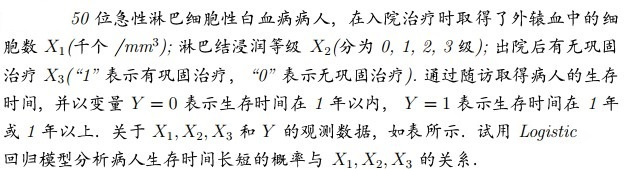
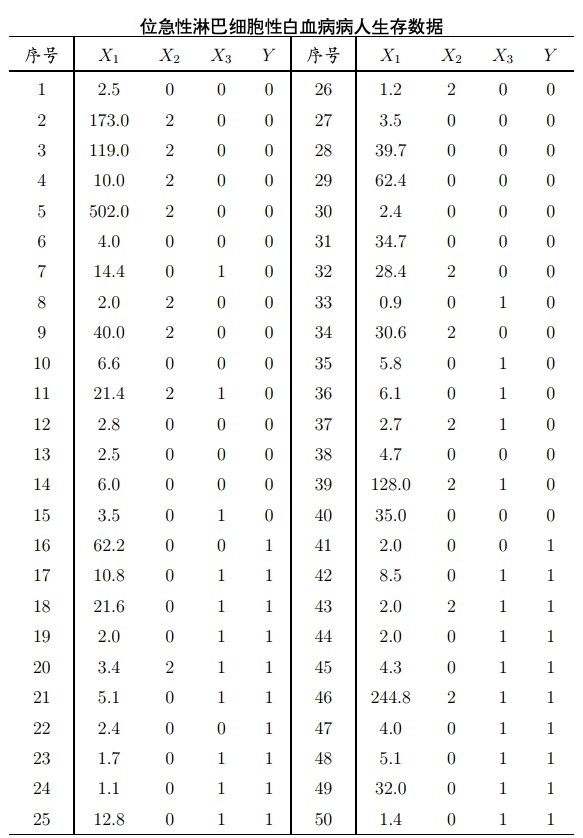


In [11]:
y1 = np.repeat([0,1,0,1],[15,10,15,10])
x1 = np.array([2.5, 173, 119, 10, 502, 4, 14.4, 2, 40, 6.6, 
        21.4, 2.8, 2.5, 6, 3.5, 62.2, 10.8, 21.6, 2, 3.4, 
        5.1, 2.4, 1.7, 1.1, 12.8, 1.2, 3.5, 39.7, 62.4, 2.4,
        34.7, 28.4, 0.9, 30.6, 5.8, 6.1, 2.7, 4.7, 128, 35, 
        2, 8.5, 2, 2, 4.3, 244.8, 4, 5.1, 32, 1.4])
x2 = np.repeat([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
            0, 2, 0, 2, 0, 2, 0],
          [1, 4, 2, 2, 1, 1, 8, 1, 5, 1, 5, 1, 1, 1, 2, 1,
            1, 1, 3, 1, 2, 1, 4])
x3 = np.repeat([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
          [6, 1, 3, 1, 3, 1, 1, 5, 1, 3, 7, 1, 1, 3, 1, 1, 2, 9])
X = np.c_[x1,x2,x3]
x_model = sm.add_constant(X)
binom_model = sm.GLM(y1,x_model,family=sm.families.Binomial())
model_results = binom_model.fit(use_t=True)
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       46
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.283
Date:                Mon, 16 Aug 2021   Deviance:                       46.567
Time:                        12:32:08   Pearson chi2:                     44.9
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6965      0.659     -2.576      0.013      -3.022      -0.371
x1             0.0023      0.006      0.409      0.684      -0.009       0.014
x2            -0.7922      0.487     -1.626      0.111      -1.773       0.189
x3             2.8304      0.793      3.567      0.001       1.233       4.427
==============================================================================
"""

In [12]:
'''
上述模型中，x1和x2的回归系数不显著，因此模型需要修正。
先去掉x1自变量再尝试
也可以通过前一节中的模型选择算法和函数进行回归变量选择
'''
import pandas as pd

X2 = np.c_[x2,x3]
x_model1 = sm.add_constant(X2)
x_model1=pd.DataFrame(x_model1,columns=['const','x2','x3'])

binom_model1 = sm.GLM(y1,x_model1,family=sm.families.Binomial())
model_results1 = binom_model1.fit()
model_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.359
Date:                Mon, 16 Aug 2021   Deviance:                       46.718
Time:                        12:32:08   Pearson chi2:                     44.8
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6419      0.638     -2.573      0.010      -2.893      -0.391
x2            -0.7070      0.428     -1.651      0.099      -1.546       0.132
x3             2.7844      0.780      3.571      0.000       1.256       4.313
==============================================================================
"""

##### 结果解读：
- 去掉x1之后，回归模型变得显著。

- 当然x2的显著性刚达到标准，如果设$\alpha=0.1$。

- 回归模型如下：
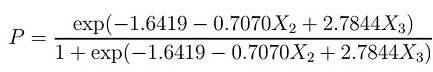

In [13]:
'''
拟合优度检验。结果显示，模型适用性还不错。
'''
import scipy.stats as st
d1=model_results1.deviance/model_results1.df_resid
p1=st.chi2.sf(model_results1.pearson_chi2,df=model_results1.df_resid)
d1,p1

(0.9939952964550413, 0.564238652316658)

In [14]:
'''
可以用来比较有无巩固治疗的疗效，
'''
#无巩固治疗：x3=0
pre1=model_results1.predict([1,2,0])
#有巩固治疗：x3=1
pre2=model_results1.predict([1,2,1])
ratio=pre2/pre1
print('有巩固治疗的生存率是无巩固治疗的%0.2f倍'%ratio)
pre2,pre1

有巩固治疗的生存率是无巩固治疗的9.62倍


(array([0.43255223]), array([0.04496518]))

### 4.5.2 泊松回归模型


#### 示例：
轰炸机的命中目标个数(y)与轰炸机类型（x1,0：A4攻击机；1：A6攻击机），载弹量（x2,单位：吨）和飞行员飞行小时(x3)之间的关系。
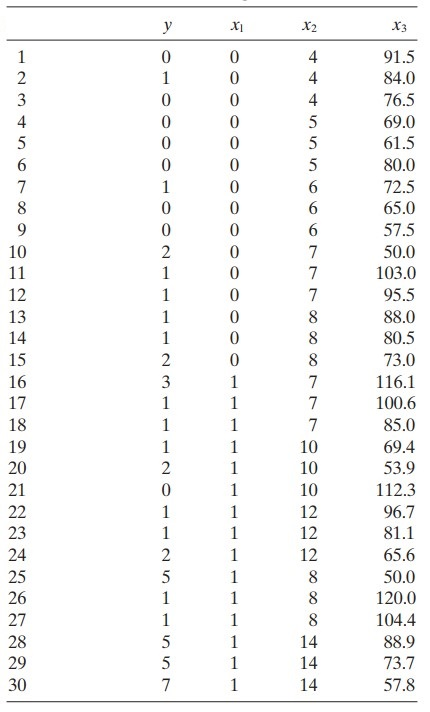

In [15]:
'''
使用泊松回归对全模型进行回归
'''
import statsmodels.formula.api as smf
damage=pd.read_excel('e:\data\Damage.xls')
fomula='y~x1+x2+x3'
poisson_model1 = smf.glm(fomula,data=damage,family=sm.families.Poisson())
poisson_results1 = poisson_model1.fit()
poisson_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       26
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.825
Date:                Mon, 16 Aug 2021   Deviance:                       25.953
Time:                        12:32:10   Pearson chi2:                     23.9
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4060      0.877     -0.463      0.644      -2.126       1.314
x1             0.5688      0.504      1.128      0.259      -0.420       1.557
x2             0.1654      0.068      2.449      0.014       0.033       0.298
x3            -0.0135      0.008     -1.633      0.102      -0.030       0.003
==============================================================================
"""

In [16]:
'''
只使用单变量x2进行回归，结果显著
'''
fomula2='y~x2'
poisson_model2 = smf.glm(fomula2,data=damage,family=sm.families.Poisson())
poisson_results2 = poisson_model2.fit()
poisson_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41.451
Date:                Mon, 16 Aug 2021   Deviance:                       29.206
Time:                        12:32:10   Pearson chi2:                     30.6
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7010      0.507     -3.356      0.001      -2.694      -0.708
x2             0.2311      0.047      4.942      0.000       0.139       0.323
==============================================================================
"""

--------------

## 4.6 非线性回归模型

- 


### 4.6.1 多项式回归模型
- #### 一元多项式回归为例

#### 示例：
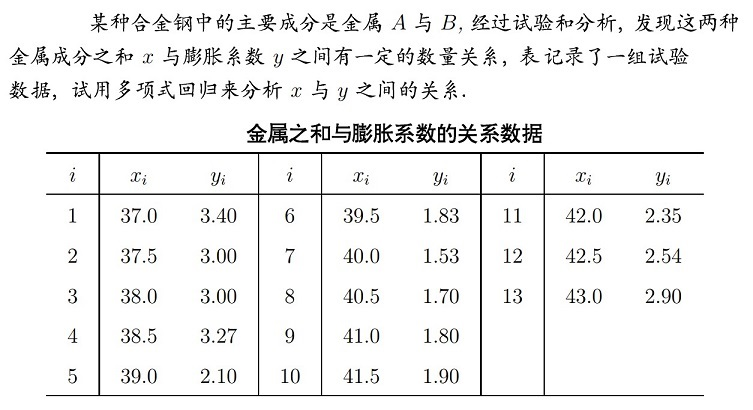

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


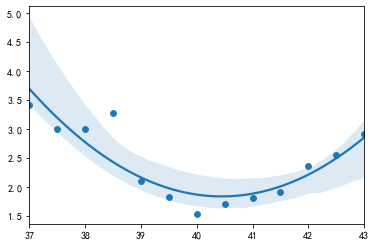

In [17]:
'''
   多项式回归模型示例
  '''
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
'''
数据探索
'''
x=np.array([37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0])
y=np.array([3.40, 3.00, 3.00, 3.27, 2.10, 1.83, 1.53,  1.70, 1.80, 1.90, 2.35, 2.54, 2.90])
data = pd.DataFrame({'y':y,'x':x})
sns.scatterplot(x,y)#散点图
sns.regplot(x,y,order=2)#二次曲线拟合
plt.show()

In [18]:
'''
使用二次多项式进行回归
'''
formula = 'y~1+x+I(x**2)'
results = smf.ols(formula=formula,data=data).fit()
results.summary()

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     18.18
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           0.000467
Time:                        12:32:12   Log-Likelihood:                -2.2905
No. Observations:                  13   AIC:                             10.58
Df Residuals:                      10   BIC:                             12.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.0696     47.003      5.469      0.000     152.341     361.799
x            -12.6203      2.354     -5.362      0.000     -17.865      -7.376
I(x ** 2)      0.1560      0.029      5.303      0.000       0.090       0.222
==============================================================================
Omnibus:                       15.782   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.334
Skew:                           1.749   Prob(JB):                      0.00346
Kurtosis:                       5.948   Cond. No.                     8.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----

### 4.6.2 正交多项式回归模型



        2
0.1878 x - 15.19 x + 308.8


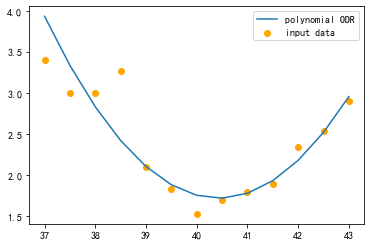

In [19]:
'''
通过scipy的正交距离回归(Orthogonal distance regression,ODR)进行正交多项式回归。
和后面的相关例子区别还是很大的。
'''
import matplotlib.pyplot as plt
from scipy import odr
import numpy as np

x=np.array([37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0])
y=np.array([3.40, 3.00, 3.00, 3.27, 2.10, 1.83, 1.53,  1.70, 1.80, 1.90, 2.35, 2.54, 2.90])
poly_model = odr.polynomial(2)  # 使用二次多项式回归模型。
data = odr.Data(x, y) ##生成正交距离数据
odr_obj = odr.ODR(data, poly_model)
output = odr_obj.run()  # 运行正交距离回归拟合
poly = np.poly1d(output.beta[::-1])
print(poly)
poly_y = poly(x)
plt.scatter(x, y, label="input data",color='orange')
#plt.scatter(x, poly_y, label="ouput data",color='red')
plt.plot(x, poly_y, label="polynomial ODR")
plt.legend()
plt.show()

In [20]:
###Scipy正交距离回归预测
betas=output.beta
x_test=np.array([41.5, 42.0, 42.5, 43.0,43.5,44.0,44.5])
x_test2=x_test**2
const=np.repeat([1],len(x_test))
x_test=np.c_[const,x_test,x_test2]
pred=np.dot(betas.T,x_test.T)
pred

array([1.93453278, 2.18181287, 2.52300777, 2.95811748, 3.487142  ,
       4.11008132, 4.82693546])

In [21]:
'''
StatsModels的正交多项式回归模型
'''

from patsy import Poly
x=np.array([37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0])
y=np.array([3.40, 3.00, 3.00, 3.27, 2.10, 1.83, 1.53,  1.70, 1.80, 1.90, 2.35, 2.54, 2.90])
data = {'x':x,'y':y}

#正交式的计算，order表示正交式的阶，此处是2，即只需要二次正交式
orthPoly  = lambda x,order:Poly().code_without_intercept(x).matrix[:,0:order]
formula = 'y~1+orthPoly(x,2)'
orthpoly_model = smf.ols(formula=formula,data=data)
results = orthpoly_model.fit()
results.summary()

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     18.18
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           0.000467
Time:                        12:32:13   Log-Likelihood:                -2.2905
No. Observations:                  13   AIC:                             10.58
Df Residuals:                      10   BIC:                             12.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4092      0.091     26.400      0.000       2.206       2.613
orthPoly(x, 2)[0]    -0.9444      0.329     -2.870      0.017      -1.678      -0.211
orthPoly(x, 2)[1]     1.7450      0.329      5.303      0.000       1.012       2.478
==============================================================================
Omnibus:                       15.782   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.334
Skew:                           1.749   Prob(JB):                      0.00346
Kurtosis:                       5.948   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
'''
手动计算正交多项式，计算函数稍微有点复杂
'''
data = pd.DataFrame({'y':y,'x':x})
polyNom = lambda x, degree : np.linalg.qr(np.vander(x, degree + 1)[:, ::-1])[0][:, 1:]
formula1 = 'y~1+polyNom(x,2)'
#orthpoly_model1 = smf.ols(formula=formula1,data=data)
results1 = smf.ols(formula=formula1,data=data).fit()#应用formula构建模型的方式的确很灵活。
results1.summary()

f:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     18.18
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           0.000467
Time:                        12:32:14   Log-Likelihood:                -2.2905
No. Observations:                  13   AIC:                             10.58
Df Residuals:                      10   BIC:                             12.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.4092      0.091     26.400      0.000       2.206       2.613
polyNom(x, 2)[0]    -0.9444      0.329     -2.870      0.017      -1.678      -0.211
polyNom(x, 2)[1]     1.7450      0.329      5.303      0.000       1.012       2.478
==============================================================================
Omnibus:                       15.782   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.334
Skew:                           1.749   Prob(JB):                      0.00346
Kurtosis:                       5.948   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
'''
正交多项式回归预测
总体上感觉，Statsmodels的正交多项式回归模型的预测做的比较复杂
而且似乎与距离相关，与数据本身无关
此方面Statsmodels和R语言的正交多项式回归模型的预测机制有所不同
'''

###使用新数据进行预测
x_test=np.arange(43,50,0.5)
print('预测变量：',x_test)
print('预测结果：',np.array(results.predict({'x':x_test})))

###原自变量预测
print('\n原自变量x：',x)
print('预测结果：',np.array(results.predict({'x':x})))

预测变量： [43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5]
预测结果： [3.65698106 3.20631612 2.82032701 2.49901375 2.24237633 2.05041474
 1.923129   1.8605191  1.86258503 1.92932681 2.06074443 2.25683788
 2.51760718 2.84305232]

原自变量x： [37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5 43. ]
预测结果： [3.68725275 3.18824176 2.76723277 2.42422577 2.15922078 1.97221778
 1.86321678 1.83221778 1.87922078 2.00422577 2.20723277 2.48824176
 2.84725275]


-------

### 4.6.3 内在非线性回归

#### 示例：
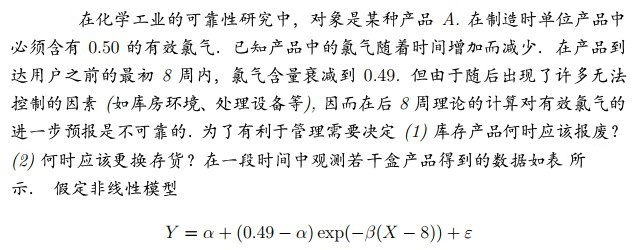

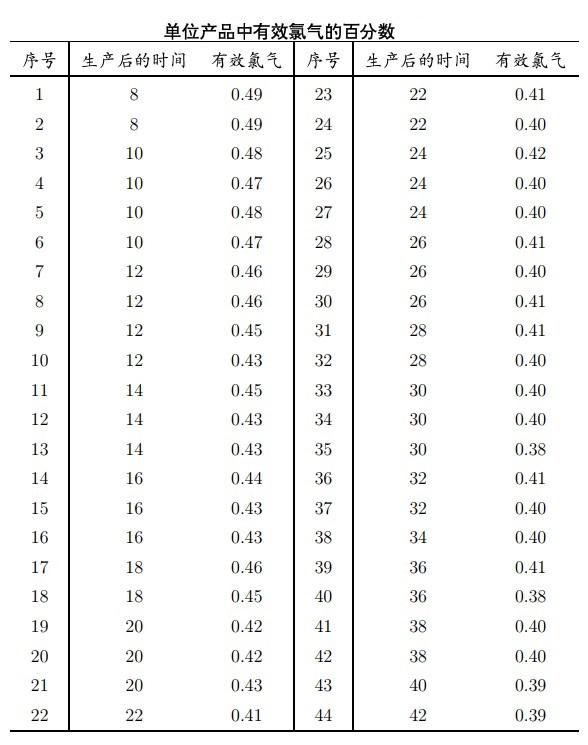

本例中的非线性回归方程：$Y=\alpha+(0.49-\alpha)e^{(-\beta(X-8))}+\epsilon$

In [24]:
'''
非线性回归分析示例
'''
import scipy.optimize as op
x1 = np.arange(8,44,2)
x = np.repeat(x1,[2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2, 2, 1, 1])
y = np.array([0.49, 0.49, 0.48, 0.47, 0.48, 0.47, 0.46, 0.46, 
       0.45, 0.43, 0.45, 0.43, 0.43, 0.44, 0.43, 0.43, 
       0.46, 0.45, 0.42, 0.42, 0.43, 0.41, 0.41, 0.40, 
       0.42, 0.40, 0.40, 0.41, 0.40, 0.41, 0.41, 0.40, 
       0.40, 0.40, 0.38, 0.41, 0.40, 0.40, 0.41, 0.38, 
       0.40, 0.40, 0.39, 0.39])

###目标函数或代价函数，
#一般通过优化方法迭代
def func(x,a,b):
    return a+(0.49-a)*np.exp(-b*(x-8))
###使用curve_fit函数拟合数据和非线性回归方程
results = op.curve_fit(func,x,y)
a = results[0][0]
b = results[0][1]
print('a的值：%.6f，b的值：%.6f'%(a,b))

##获取参数估计的方差
var1 = results[1]
a_std = np.sqrt(np.diag(var1)[0])
b_std = np.sqrt(np.diag(var1)[1])
print('a参数估计的标准差：%.6f，b参数估计的标准差：%.6f' % (a_std, b_std))
results

a的值：0.390140，b的值：0.101633
a参数估计的标准差：0.005045，b参数估计的标准差：0.013360


(array([0.39014001, 0.1016327 ]), array([[2.54520196e-05, 5.98436879e-05],
        [5.98436879e-05, 1.78493841e-04]]))

In [25]:
###手工计算相关的统计量，包括回归参数的检验，R方等
from  scipy.stats import t,f
y_hat = results[0][0]+(0.49-results[0][0])*np.exp(-results[0][1]*(x-8))
res = y- y_hat
sse = np.sum(res**2)
sst = np.sum((y-np.mean(y))**2)
R_squared = 1-sse/sst
print("R方等于：",R_squared)
t_a = a/a_std
print("参数a的t值：",np.round(t_a,6))
t_b = b/b_std
print("参数b的t值：",np.round(t_b,6))
p_a = 2*t.sf(t_a,42)
print("参数a的t检验的P值：",p_a)
p_b = 2*t.sf(t_b,42)
print("参数b的t检验的P值：",p_b)

R方等于： 0.8733751998874801
参数a的t值： 77.332022
参数b的t值： 7.607147
参数a的t检验的P值： 6.345915486808226e-47
参数b的t检验的P值： 1.9931478114135762e-09


In [26]:
###计算回归系数alpha和beta的置信区间，结果表明系数估计显著性程度很高
a_confint_left = a - t.ppf(0.975,42)*a_std
a_confint_right = a + t.ppf(0.975,42)*a_std
print("参数a的置信区间: [%0.6f,%0.6f]"%(a_confint_left,a_confint_right))
b_confint_left = b - t.ppf(0.975,42)*b_std
b_confint_right = b + t.ppf(0.975,42)*b_std
print("参数b的置信区间: [%0.6f,%0.6f]"%(b_confint_left,b_confint_right))

参数a的置信区间: [0.379959,0.400321]
参数b的置信区间: [0.074671,0.128595]


------

### 4.6.4 阶梯函数
阶梯函数将自变量$X$的取值范围分成一些区间，每个区间拟合一个常数。这种做法相当于将一个连续型变量转换成有序的分类变量。本节使用Wage数据集，构建工资和年龄之间的回归模型，然后预测某人是高收入者的概率。

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('e:\\data\\wage.csv')
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = True)

In [28]:
df.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [29]:
df_cut, bins,np.unique(df.age)

(0       (17.938, 33.5]
 1       (17.938, 33.5]
 2         (33.5, 49.0]
 3         (33.5, 49.0]
 4         (49.0, 64.5]
              ...      
 2995      (33.5, 49.0]
 2996    (17.938, 33.5]
 2997    (17.938, 33.5]
 2998    (17.938, 33.5]
 2999      (49.0, 64.5]
 Name: age, Length: 3000, dtype: category
 Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]],
 array([17.938, 33.5  , 49.   , 64.5  , 80.   ]),
 array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 80], dtype=int64))

In [30]:
age_grid = np.arange(df.age.min(), df.age.max())

###age,分段，wage形成新的阶梯数据
df_steps = pd.concat([df.age, df_cut, df.wage], keys = ['age','age_cuts','wage'], axis = 1)
# 为年龄age分组创建哑变量
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])
#print('完整数据：\n',df_steps_dummies)
#增加截距项的常数1向量
df_steps_dummies = sm.add_constant(df_steps_dummies)
# age分段的哑变量；删除(17.938, 33.5]
df_steps_dummies = df_steps_dummies.drop(df_steps_dummies.columns[1], axis = 1)

In [31]:
df_steps,df_steps_dummies

(      age        age_cuts        wage
 0      18  (17.938, 33.5]   75.043154
 1      24  (17.938, 33.5]   70.476020
 2      45    (33.5, 49.0]  130.982177
 3      43    (33.5, 49.0]  154.685293
 4      50    (49.0, 64.5]   75.043154
 ...   ...             ...         ...
 2995   44    (33.5, 49.0]  154.685293
 2996   30  (17.938, 33.5]   99.689464
 2997   27  (17.938, 33.5]   66.229408
 2998   27  (17.938, 33.5]   87.981033
 2999   55    (49.0, 64.5]   90.481913
 
 [3000 rows x 3 columns],       const  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
 0       1.0             0             0             0
 1       1.0             0             0             0
 2       1.0             1             0             0
 3       1.0             1             0             0
 4       1.0             0             1             0
 ...     ...           ...           ...           ...
 2995    1.0             1             0             0
 2996    1.0             0             0             0
 2997    1

In [32]:
###使用wage作为因变量，年龄的分段哑变量作为因变量
results_step1 = sm.OLS(df_steps.wage, df_steps_dummies).fit()
results_step1.summary().tables[1]
#results_step1.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.264,97.053
"(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.466,27.641
"(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.610,27.719
"(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.139,17.420


In [33]:
###将测试数据放进与训练数据相同的bin里
bin_mapping = np.digitize(age_grid.ravel(), bins)
###获取bin_mapping值分别为[1,2,3,4],年龄所对应的年龄段的索引，
#去掉第一个分段，增加常数项
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))

#X_test2 = sm.add_constant(pd.get_dummies(bin_mapping))
###使用线性模型预测生成年龄的值
pred1 = results_step1.predict(X_test2)
# 使用逻辑斯蒂模型
y = (df.wage > 250).map({False:0, True:1}).values
bin_mapping,X_test2,pred1

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64),
     const  2  3  4
 0     1.0  0  0  0
 1     1.0  0  0  0
 2     1.0  0  0  0
 3     1.0  0  0  0
 4     1.0  0  0  0
 ..    ... .. .. ..
 57    1.0  0  0  1
 58    1.0  0  0  1
 59    1.0  0  0  1
 60    1.0  0  0  1
 61    1.0  0  0  1
 
 [62 rows x 4 columns],
 0      94.158392
 1      94.158392
 2      94.158392
 3      94.158392
 4      94.158392
          ...    
 57    101.798984
 58    101.798984
 59    101.798984
 60    101.798984
 61    101.798984
 Length: 62, dtype: float64)

In [34]:
results_step2 = sm.GLM(y, df_steps_dummies,
              family=sm.families.Binomial()).fit()
#print(results_step2.summary())
pred2 = results_step2.predict(X_test2)
pred2

0     0.006667
1     0.006667
2     0.006667
3     0.006667
4     0.006667
        ...   
57    0.013889
58    0.013889
59    0.013889
60    0.013889
61    0.013889
Length: 62, dtype: float64

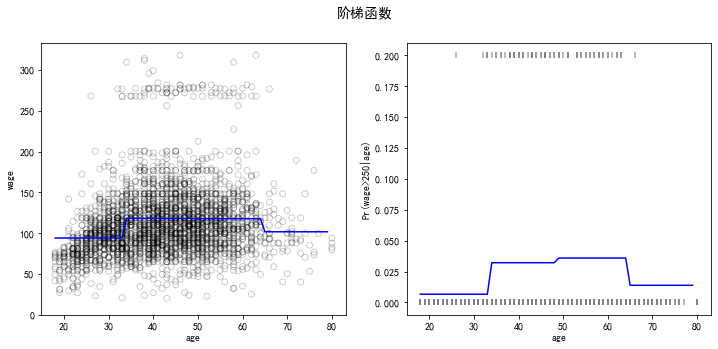

In [35]:

###画图
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('阶梯函数', fontsize = 14)

###散点图与多项式回归曲线
ax1.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'k', alpha = 0.2)
ax1.plot(age_grid, pred1,c='blue')
ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin = 0)

###逻辑斯蒂回归显示根据年龄范围预测高薪的概率
ax2.plot(np.arange(df.age.min(), df.age.max()), pred2, c = 'blue')
###地毯图显示了训练数据中薪水高于250(千元)的分布，地毯图的顶部为‘真’，底部为‘假’
ax2.scatter(df.age, y/5, s = 30, color = 'grey', marker = '|', alpha = 0.7)
ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)')
plt.show()

---


### 4.6.5 回归样条



In [36]:
'''
使用Patsy的cr函数生成自然3次样条(有时候简称自然样条)
和BSpline的bs函数一起是最常用的两种样条基函数
'''
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
from patsy import dmatrix,cr,bs
from sklearn.model_selection import train_test_split
import seaborn as sns

###读取数据集
data = pd.read_csv("e:\\data\Wage.csv")
data_x = data['age']
data_x1 = data['year']
data_x2 = data['education']
data_y = data['wage']

###通过patsy的cr构建自然3次样条基，
#dmatrix构建自变量的样条基设计矩阵
#可用formula或直接调用，各有优缺点

formula_trans1 =r'wage~cr(age,df=5)'
###注意sm.OLS和smf.ols两种拟合函数传递参数的不同形式
fit1 = smf.ols(formula_trans1,{'wage':data_y,'age':data_x}).fit(disp = 0)
fit1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,80.7444,2.033,39.708,0.000,76.757,84.732
"cr(age, df=5)[0]",-23.1033,3.691,-6.259,0.000,-30.341,-15.866
"cr(age, df=5)[1]",29.9115,2.545,11.751,0.000,24.921,34.902
"cr(age, df=5)[2]",37.6694,2.148,17.538,0.000,33.458,41.881
"cr(age, df=5)[3]",35.1290,2.792,12.582,0.000,29.654,40.604
"cr(age, df=5)[4]",1.1378,9.043,0.126,0.900,-16.594,18.870


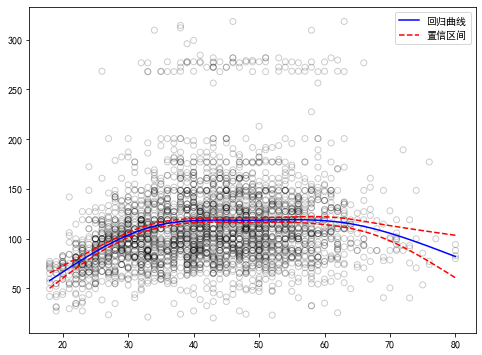

In [37]:
'''
回归样条预测以及置信区间。
'''
###测试年龄数据：从18-80岁
age_x=np.arange(data_x.min(),data_x.max()+1,1)
###获取预测对象，使用测试数据。
pred_fit1=fit1.get_prediction({'age':age_x})
###获取预测值的置信区间。
pred_conf=pred_fit1.conf_int()
plt.figure(figsize=(8,6))
plt.plot(age_x,pred_fit1.predicted_mean,color='blue',label='回归曲线') #回归曲线
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.2)
###绘制置信上下限曲线，红色曲线。
plt.plot(age_x,pred_conf[:,0],linestyle='--',color='r',label='置信区间') #置信上限
plt.plot(age_x,pred_conf[:,1],linestyle='--',color='r') #置信下限
plt.legend()
plt.show()

In [38]:
'''
模型选择，注意这里采用多元回归分析
'''
#model2
from patsy import dmatrix,cr
###第1个模型采用age和education作为自变量，age采用自然三次样条基
X_transformed1 = dmatrix('cr(age,df=5) + education', 
                         data = {'age':data['age'],
                                 'education':data['education']} ,
                         return_type = 'dataframe')
fit1 = sm.OLS(data['wage'],X_transformed1).fit(disp = 0)

###第2个模型采用year（工作年限）、age和education作为自变量，age采用自然三次样条基
X_transformed2 = dmatrix('year + cr(age,df=5) + education', 
                         data = {'year':data['year'],
                                 'age':data['age'],
                                 'education':data['education']} ,
                         return_type = 'dataframe')
fit2 = sm.OLS(data['wage'],X_transformed2).fit(disp = 0)

###第3个模型采用year（工作年限）、age和education作为自变量，year和age采用自然三次样条基
X_transformed3 = dmatrix('cr(year,df = 4) + cr(age,df=5) + education', 
                         data = {'year':data['year'],'age':data['age'],
                                 'education':data['education']} ,
                         return_type = 'dataframe')
fit3 = sm.OLS(data['wage'],X_transformed3).fit(disp = 0)

In [39]:
X_transformed1.head()

,Intercept,education[T.2. HS Grad],education[T.3. Some College],education[T.4. College Grad],education[T.5. Advanced Degree],"cr(age, df=5)[0]","cr(age, df=5)[1]","cr(age, df=5)[2]","cr(age, df=5)[3]","cr(age, df=5)[4]"
0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.510027,0.603840,-0.143360,0.034435,-0.004941
2,1.0,0.0,1.0,0.0,0.0,-0.030933,0.193600,0.921600,-0.098384,0.014118
3,1.0,0.0,0.0,1.0,0.0,-0.053004,0.355062,0.801975,-0.121462,0.017429
4,1.0,1.0,0.0,0.0,0.0,0.013156,-0.078937,0.966712,0.115269,-0.016200


In [40]:
'''
BSpline示例
和R语言的相关函数进行对比，结果一致
'''
import patsy
X_trans_bs = patsy.dmatrix('patsy.bs(year,df=4,degree=3) + \
                            patsy.bs(age,df=5,degree=3) + C(education)', 
                         data = {'year':data['year'],'age':data['age'], 
                                 'education':data['education']} ,
                         return_type = 'dataframe')
###仍是将自变量转换成B样条基，然后使用最小二乘进行参数估计
fit_bs = sm.OLS(data['wage'],X_trans_bs).fit(disp = 0)
fit_bs.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,48.1113,6.024,7.987,0.000,36.300,59.922
C(education)[T.2. HS Grad],10.9936,2.432,4.521,0.000,6.226,15.761
C(education)[T.3. Some College],23.4713,2.564,9.155,0.000,18.444,28.498
C(education)[T.4. College Grad],38.2625,2.550,15.006,0.000,33.263,43.262
C(education)[T.5. Advanced Degree],62.4870,2.762,22.626,0.000,57.072,67.902
"patsy.bs(year, df=4, degree=3)[0]",0.5586,3.990,0.140,0.889,-7.264,8.381
"patsy.bs(year, df=4, degree=3)[1]",10.1098,5.084,1.989,0.047,0.141,20.079
"patsy.bs(year, df=4, degree=3)[2]",3.5835,3.990,0.898,0.369,-4.240,11.407
"patsy.bs(year, df=4, degree=3)[3]",7.6714,2.343,3.275,0.001,3.078,12.265
"patsy.bs(age, df=5, degree=3)[0]",5.6405,9.475,0.595,0.552,-12.939,24.219


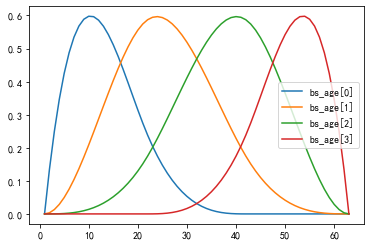

In [41]:
###样条回归的样条基到底是什么样的？
age_limt=np.arange(df.age.min(),df.age.max()+1,1)
bs_age=np.array(patsy.bs(age_limt,df=5,degree=3))
l=np.arange(1,bs_age.shape[0]+1,1)
plt.plot(l,bs_age[:,0],label='bs_age[0]')
plt.plot(l,bs_age[:,1],label='bs_age[1]')
plt.plot(l,bs_age[:,2],label='bs_age[2]')
plt.plot(l,bs_age[:,3],label='bs_age[3]')
plt.legend()
plt.show()

In [42]:
###通过方差分析比较fit1、fit2、fit3、fit_bs模型
table = sm.stats.anova_lm(fit1,fit2,fit3,fit_bs)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2991.0,3.717318e+06,0.0,NaN,NaN,NaN
1,2990.0,3.700612e+06,1.0,16706.497430,13.505650,0.000242
2,2988.0,3.698981e+06,2.0,1630.744277,0.659153,0.517365
3,2986.0,3.693684e+06,2.0,5296.943300,2.141043,0.117713


#### 结果解读
 ###### (1)模型方差分析结果的统计量：

- df_resid：模型的残差自由度 

- ssr :  模型残差平方和.

- df_diff : 本模型与前一个模型的自由度的差别

- ss_dff : 与前一个模型SSR的差别

- F : 与以前一个模型的F统计量的差别

- PR(>F):  与前一个模型比较的显著性程度的差别

###### (2) 方差分析表格的结果分析：
结果表格可以得出，四个模型相比，只有第二个模型的显著性程度最高，而且残差平方和相比较前一个而言下降最为显著。



------

### 4.6.6 广义可加模型


In [43]:
'''
  使用Wage拟合广义可加模型
'''
import pandas as pd
import numpy as np
from statsmodels.gam.api import GLMGam, BSplines
import matplotlib.pyplot as plt
import seaborn as sns
wage_data = pd.read_csv('e:\\data\\Wage.csv')
year = wage_data['year']
age = wage_data['age']
education= wage_data['education']
wage = wage_data['wage']

###构建平滑器
x_spline1 = pd.DataFrame(np.array([year,age]).T,columns=('year','age'))
bs = BSplines(x_spline1, df=[5, 6], degree=[3, 3],include_intercept=False)

###可加模型加入的变量函数开始估计的初始值
alpha = np.array([0.5, 0.5])
#注意GAM的公式里无year和age两个自变量，是通过smoother=bs加入的
gam_bs = GLMGam.from_formula('wage ~  C(education)', 
                             data={'wage':wage,
                                   'year':year,
                                   'age':age,
                                   'education':education},
                             smoother=bs, alpha=alpha)#
ressults_gam = gam_bs.fit(use_t=True)#使用t分布估计和检验参数
ressults_gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                         GLMGam   Df Residuals:                  2986.03
Model Family:                Gaussian   Df Model:                        12.97
Link Function:               identity   Scale:                          1237.0
Method:                         PIRLS   Log-Likelihood:                -14930.
Date:                Mon, 16 Aug 2021   Deviance:                   3.6937e+06
Time:                        12:32:22   Pearson chi2:                 3.69e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             48.1055      6.023      7.987      0.000      36.296      59.915
C(education)[T.2. HS Grad]            10.9934      2.431      4.521      0.000       6.226      15.761
C(education)[T.3. Some College]       23.4719      2.564      9.155      0.000      18.445      28.499
C(education)[T.4. College Grad]       38.2611      2.550     15.006      0.000      33.262      43.261
C(education)[T.5. Advanced Degree]    62.4874      2.762     22.626      0.000      57.072      67.902
year_s0                                0.6210      3.952      0.157      0.875      -7.127       8.369
year_s1                               10.0111      5.034      1.989      0.047       0.141      19.881
year_s2                                3.6627      3.948      0.928      0.354      -4.079      11.405
year_s3                                7.6646      2.340      3.276      0.001       3.077      12.253
age_s0                                 5.6429      9.474      0.596      0.551     -12.934      24.220
age_s1                                43.9996      5.521      7.970      0.000      33.174      54.825
age_s2                                35.4863      8.203      4.326      0.000      19.403      51.570
age_s3                                41.1384      9.126      4.508      0.000      23.245      59.032
age_s4                                 8.6344     13.726      0.629      0.529     -18.278      35.547
======================================================================================================
"""

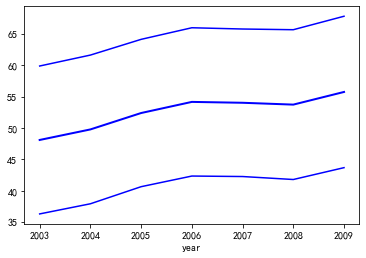

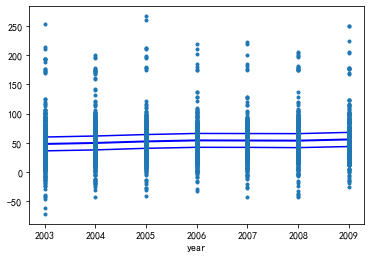

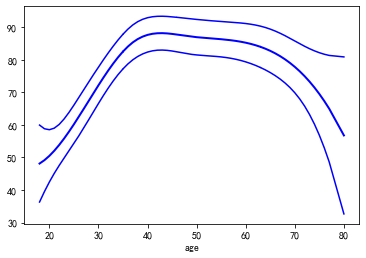

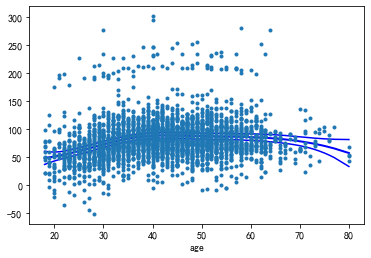

In [44]:
###绘制平滑项(即year和age)对线性回归的贡献
#year的贡献
ressults_gam.plot_partial(0, cpr=False)
ressults_gam.plot_partial(0, cpr=True)
#age的贡献
ressults_gam.plot_partial(1, cpr=False)
ressults_gam.plot_partial(1, cpr=True)
plt.plot()
plt.show()

-------------